# 라이브러리 불러오기

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# yahoo finance 데이터 세트 불러올 시작일 정의

---



In [2]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# dataset 로드할 함수 정의

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('005930.ks') #삼성전자
df=data
df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
3659,2024-11-11 00:00:00+00:00,55000.0,55000.0,56800.0,55000.0,56700.0,29811326
3660,2024-11-12 00:00:00+00:00,53000.0,53000.0,54600.0,53000.0,54600.0,37962881
3661,2024-11-13 00:00:00+00:00,50600.0,50600.0,53000.0,50500.0,52000.0,52527995
3662,2024-11-14 00:00:00+00:00,49900.0,49900.0,51800.0,49900.0,50200.0,48510715
3663,2024-11-15 00:00:00+00:00,53500.0,53500.0,54200.0,50300.0,50300.0,46774485


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-4-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
0,16180.0,16180.0,16000.0,16060.0,11950800
1,16440.0,16580.0,16300.0,16520.0,27925850
2,16820.0,16820.0,16520.0,16580.0,22948850
3,16260.0,16820.0,16260.0,16820.0,22107950
4,16420.0,16420.0,16120.0,16400.0,14777550


종가 시각화

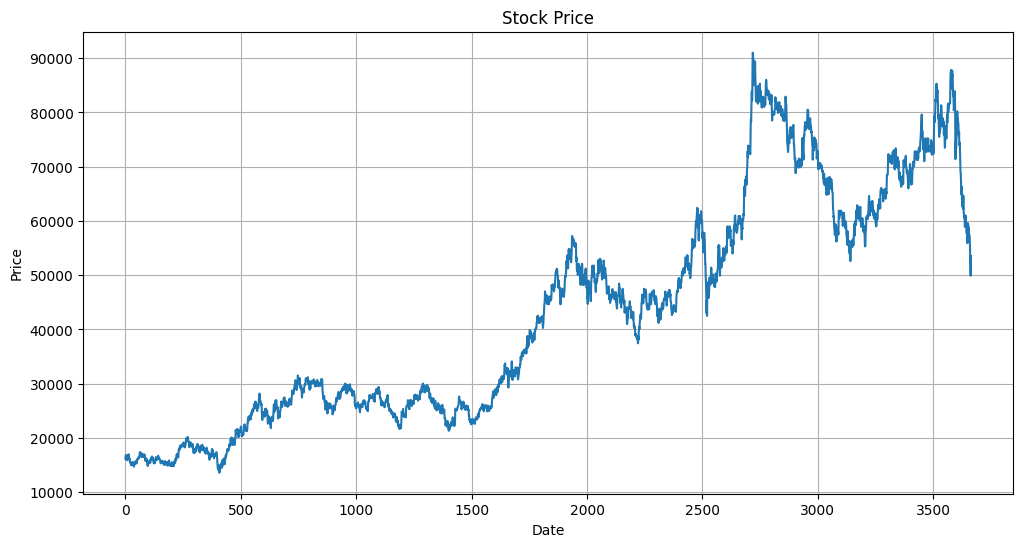

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [6]:
df

Price,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
0,16180.0,16180.0,16000.0,16060.0,11950800
1,16440.0,16580.0,16300.0,16520.0,27925850
2,16820.0,16820.0,16520.0,16580.0,22948850
3,16260.0,16820.0,16260.0,16820.0,22107950
4,16420.0,16420.0,16120.0,16400.0,14777550
...,...,...,...,...,...
3659,55000.0,56800.0,55000.0,56700.0,29811326
3660,53000.0,54600.0,53000.0,54600.0,37962881
3661,50600.0,53000.0,50500.0,52000.0,52527995


# 100일치 이동평균 플롯

*이동평균이란?*

*전체 데이터 집합의 여러 하위 집합에 대한 일련의 평균을 만들어 데이터 요소를 분석하는 계산*

---



In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,005930.KS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3659,72076.0
3660,71810.0
3661,71535.0
3662,71236.0


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

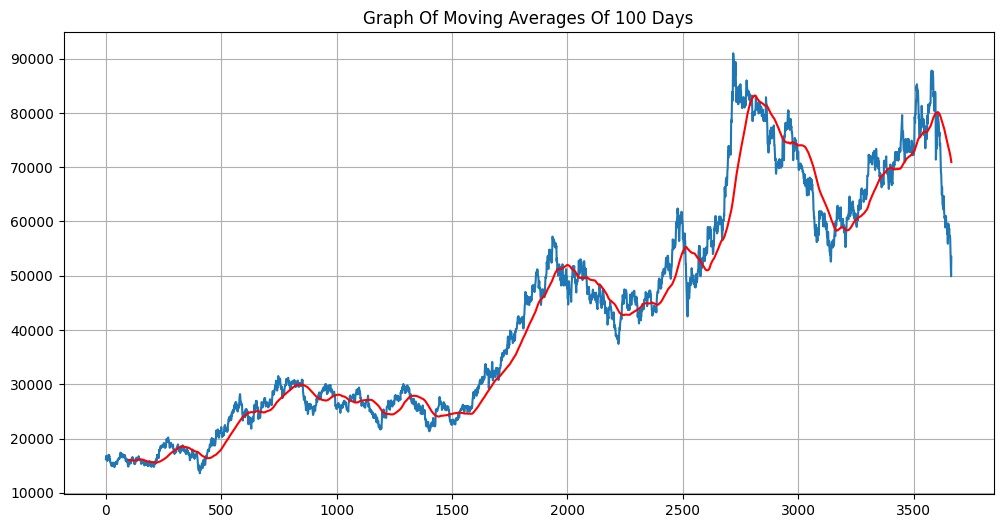

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# 200일치 이동평균,+ 100일치 이동평균 그래프랑 비교

---



In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,005930.KS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3659,74330.0
3660,74232.0
3661,74130.0
3662,74021.0


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

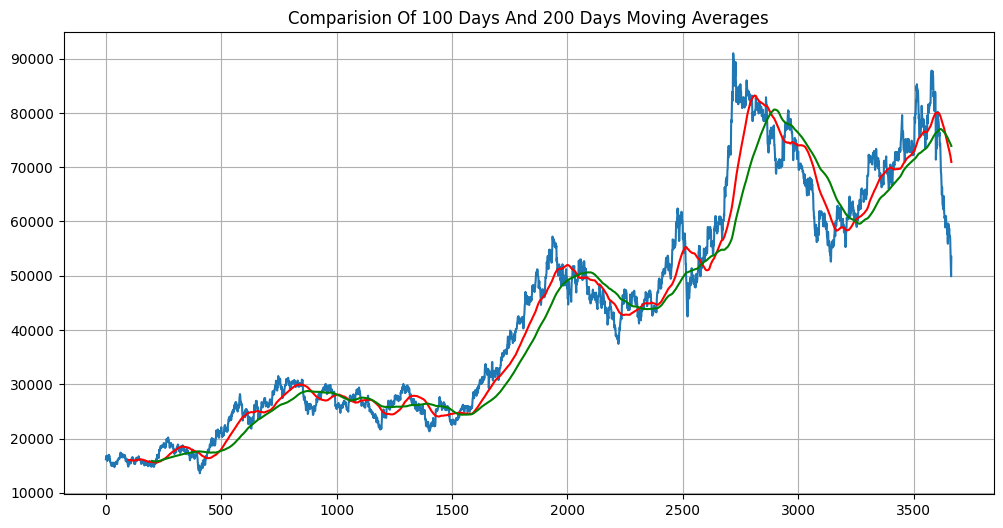

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [11]:
df.shape

(3664, 5)

# 데이터 세트를 훈련 데이터셋(70%) 및 테스트 데이터셋(30%) 분할

In [12]:
# 훈련 데이터셋 테스트 데이터셋 분할

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2564, 7)
(1100, 7)


In [13]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
0,2010-01-04 00:00:00+00:00,12206.103516,16180.0,16180.0,16000.0,16060.0,11950800
1,2010-01-05 00:00:00+00:00,12402.249023,16440.0,16580.0,16300.0,16520.0,27925850
2,2010-01-06 00:00:00+00:00,12688.916992,16820.0,16820.0,16520.0,16580.0,22948850
3,2010-01-07 00:00:00+00:00,12266.458008,16260.0,16820.0,16260.0,16820.0,22107950
4,2010-01-08 00:00:00+00:00,12387.159180,16420.0,16420.0,16120.0,16400.0,14777550


In [14]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
2564,2020-05-28 00:00:00+00:00,44908.910156,50400.0,51200.0,49900.0,51100.0,31309318
2565,2020-05-29 00:00:00+00:00,45176.238281,50700.0,50700.0,49700.0,50000.0,27596961
2566,2020-06-01 00:00:00+00:00,45621.761719,51200.0,51200.0,50600.0,50800.0,16949183
2567,2020-06-02 00:00:00+00:00,45799.980469,51400.0,51500.0,50800.0,51000.0,14247933
2568,2020-06-03 00:00:00+00:00,48562.226562,54500.0,55000.0,51700.0,51800.0,49257814


# MinMax scaler를 이용한 데이터 셋의 표준화

---



In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [17]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.053046  ],
       [0.05926233],
       [0.06382097],
       ...,
       [0.7254455 ],
       [0.72855367],
       [0.73269789]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(2464, 100, 1)

# 머신러닝 모델 LSTM

---



In [20]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# 모델 학습

---



In [23]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - loss: 0.0575 - mean_absolute_error: 0.1678
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0104 - mean_absolute_error: 0.0724
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0063 - mean_absolute_error: 0.0557
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0057 - mean_absolute_error: 0.0540
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0053 - mean_absolute_error: 0.0522
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0054 - mean_absolute_error: 0.0518
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0052 - mean_absolute_error: 0.0493
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0046 - mean_absolute_error: 0.0477
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0050 - mean_absolute_error: 0.0489
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0044 - mean_absolute_error: 0.0461
Epoch 11/100
77/77 ━━━━━━━━

In [24]:
model.save('keras_model.h5')

In [25]:
test_close.shape

(1100, 1)

In [26]:
past_100_days = pd.DataFrame(train_close[-100:])

In [27]:
test_df = pd.DataFrame(test_close)

**
테스트 데이터셋의 첫번째 열에서 예측을 얻기위해 학습데이터 셋의 마지막 100개 열을 포함해 테스트를 위한 최종 데이터 세트를 정의
**

---


In [28]:
import pandas as pd
#데이터 프레임 결합
# pd.concat, append를 대체. :
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [29]:
final_df.head()

,0
0,55700.0
1,55000.0
2,54900.0
3,54600.0
4,55600.0


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.28389831],
       [0.2690678 ],
       [0.26694915],
       ...,
       [0.17372881],
       [0.16101695],
       [0.16949153]])

In [31]:
input_data.shape

(1200, 1)

# 모델 테스트

---



In [32]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1100, 100, 1)
(1100,)


# 예측
# 실제 데이터 값과 예측한 데이터 값 비교 그래프

---



In [34]:
# 예측

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [35]:
y_pred.shape

(1100, 1)

In [36]:
y_test

array([0.16101695, 0.15677966, 0.17584746, ..., 0.17372881, 0.16101695,
       0.16949153])

In [37]:
y_pred

array([[0.23115431],
       [0.23318528],
       [0.23536125],
       ...,
       [0.33403292],
       [0.32453275],
       [0.31252086]], dtype=float32)

In [38]:
scaler.scale_

array([2.11864407e-05])

In [39]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

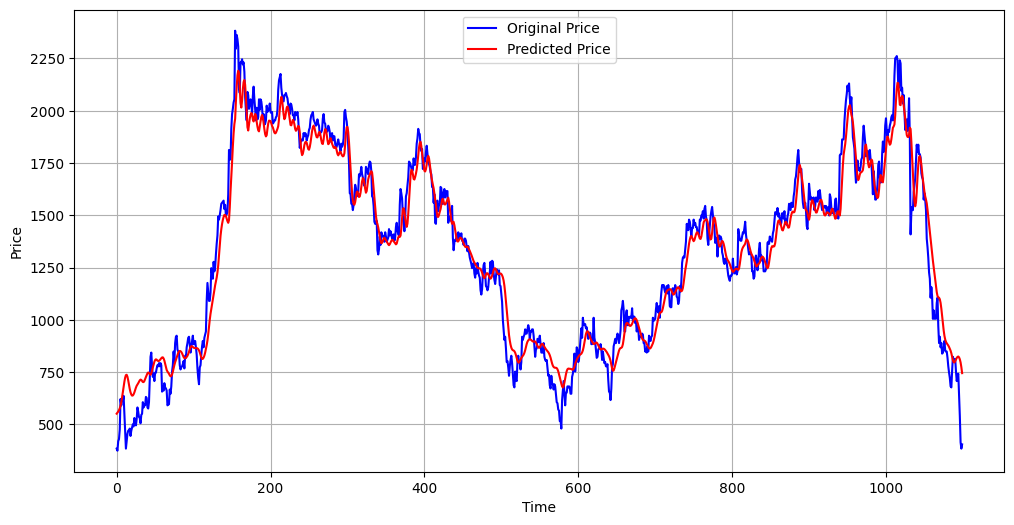

In [40]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 모델 평가





#MAE평균절대오차 계산

In [41]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.60%


#결정계수 계산

In [42]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9538251340165464


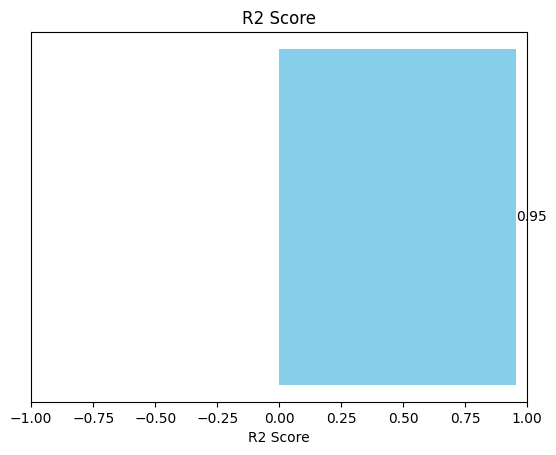

In [43]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

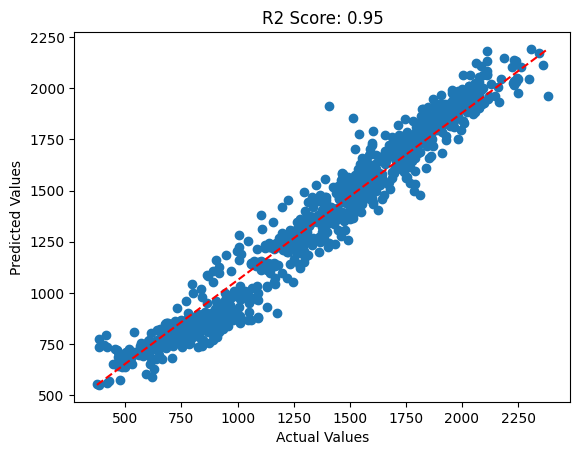

In [44]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()